In [2]:
!pip install tensorflow

In [3]:
!pip install matplotlib
!pip install numpy

In [4]:
import pandas as pd 

In [5]:
sl_test = pd.read_csv('archive/sign_mnist_test.csv')
sl_train = pd.read_csv('archive/sign_mnist_train.csv') 

In [6]:
sl_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [7]:
sl_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
print(len(sl_train))


27455


In [9]:
sl_values = sl_train['pixel1'].values
print (sl_values.max())
print (sl_values.min())

255
0


In [10]:
print(len(sl_train['label'].unique()))

24


In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [12]:
x_train = sl_train.drop('label', axis=1).values
y_train = sl_train['label'].values

x_test = sl_test.drop('label', axis=1).values
y_test = sl_test['label'].values

# Remap labels to be continuous (0-23)
def remap_labels(y):
    return np.where(y > 9, y - 1, y)

y_train = remap_labels(y_train)
y_test = remap_labels(y_test)

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Create validation split
val_size = int(0.1 * len(x_train))
x_val = x_train[:val_size]
y_val = y_train[:val_size]
x_train = x_train[val_size:]
y_train = y_train[val_size:]

# Create datasets
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1000).batch(32)
val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [13]:
print("Shape of y_train:", y_train.shape)
print("Unique labels:", np.sort(np.unique(y_train)))

Shape of y_train: (24710,)
Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [14]:
print("Shape of y_train:", y_train.shape)
print("Unique labels:", np.sort(np.unique(y_train)))

Shape of y_train: (24710,)
Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [15]:
print(x_test)

[[0.58431375 0.58431375 0.5882353  ... 0.4392157  0.47058824 0.41960785]
 [0.49411765 0.5019608  0.5137255  ... 0.72156864 0.7137255  0.7058824 ]
 [0.33333334 0.34509805 0.36078432 ... 0.88235295 0.8784314  0.87058824]
 ...
 [0.74509805 0.7490196  0.74509805 ... 0.827451   0.81960785 0.8156863 ]
 [0.7882353  0.8039216  0.8156863  ... 0.2627451  0.27450982 0.24705882]
 [0.6784314  0.68235296 0.6784314  ... 0.7647059  0.75686276 0.7529412 ]]


In [16]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(24, activation='softmax')  # Changed to 24 classes (0-23)
])

model.summary()

c:\Users\Asus\anaconda3\envs\SL_MNIST\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │         1,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,296 (430.84 KB)

 Trainable params: 110,296 (430.84 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds,
                   validation_data=val_ds,
                   epochs=8)

Epoch 1/8
773/773 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2239 - loss: 2.5588 - val_accuracy: 0.5443 - val_loss: 1.4297
Epoch 2/8
773/773 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5789 - loss: 1.3061 - val_accuracy: 0.6914 - val_loss: 0.9685
Epoch 3/8
773/773 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7021 - loss: 0.9241 - val_accuracy: 0.7537 - val_loss: 0.7285
Epoch 4/8
773/773 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7891 - loss: 0.6636 - val_accuracy: 0.8372 - val_loss: 0.5290
Epoch 5/8
773/773 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8436 - loss: 0.5037 - val_accuracy: 0.8299 - val_loss: 0.4896
Epoch 6/8
773/773 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8771 - loss: 0.3901 - val_accuracy: 0.9020 - val_loss: 0.2943
Epoch 7/8
773/773 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9221 - loss: 0.2637 - val_accuracy: 0.9275 - val_loss: 0.2375
Epoch 8/8
773/773 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9403 - loss: 0.2148 - val_accuracy: 0.9446 - v

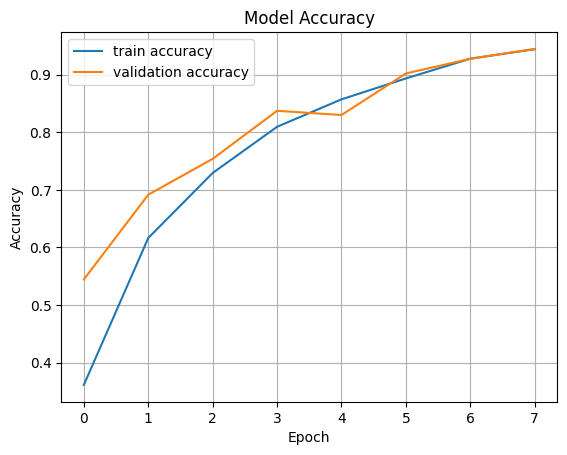

In [18]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.7076 - loss: 1.1299
Test accuracy: 0.7118


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step


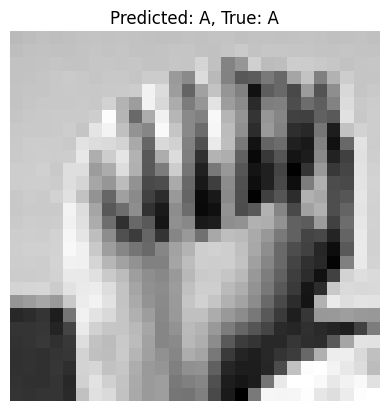

In [20]:
numbers_to_letters = {i: chr(65 + i) for i in range(24)}

predictions = model.predict(x_test)

def show_prediction(index):
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {numbers_to_letters.get(np.argmax(predictions[index]))}, True: {numbers_to_letters.get(y_test[index])}")
    plt.axis('off')
    plt.show()

# 🔁 Try different indexes!
show_prediction(3)